## Australian rain dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [2]:
df = pd.read_csv("data/weatherAUS.csv")
print(f"Shape: {df.shape}")
print(f"Shape dropping all missing values: {df.dropna().shape}")
print("-------------------------------------------")
print(f"List of columns: {list(df.columns)}")

Shape: (145460, 23)
Shape dropping all missing values: (56420, 23)
-------------------------------------------
List of columns: ['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow']


In [3]:
df_noNAN = df.dropna()  # to see all columns with a value
df_noNAN.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No
6050,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No
6052,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No
6053,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No
6054,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,...,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,No


In [4]:
print("Types of variables:")
print(df.dtypes)

Types of variables:
Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object


In [5]:
# Missing values
print(f"Missing values:")
print(df.isnull().sum())

Missing values:
Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64


### Handle missing values:
**Cloud9am, Cloud3pm** --> DROP COLUMNS (too many datapoints lost if missing values are dropped (~50%), but probably bad info if nan replaced with average over given period or other methods).

**Evaporation, Sunshine** --> DROP COLUMNS (too many datapoints lost if missing values are dropped (~50%), prefer to drop to avoid having too many datapoints created instead of collected).


**Rainfall, MinTemp, Maxtemp, Temp9am, Humidity9am, Temp3pm, Humidity3pm, Pressure9am, Pressure3pm** --> forward fill  (all these features depend on the period of the year, hence better to use the closets datapoint in time, not average for the entire sample). ***!! this is ok only if we consider the same location, because otherwise we might replace with a value from a different location with very different weather conditions)***


**WindGustSpeed, WindSpeed9am, WindSpeed3pm** --> DROP MISSING VALUES (does average make sense? probably not).

**WindGustDir, WindDir9am, WindDir3pm** --> DROP MISSING VALUES (not numbers, no good way to substitue, we can't know the value, we don't know if nan means no wind or just not recorded data).

**RainToday, RainTomorrow** --> DROP MISSING VALUES (we don't know the value, we can't substitute),

In [6]:
print(df["Location"].unique())
print(f"Number of different locations: {len(df['Location'].unique())}")
print("--------------------------------------------------")
print("Unique values for wind variables:")
print(df["WindGustDir"].unique())
print(df["WindDir9am"].unique())
print(df["WindDir3pm"].unique())
# feasible to use Date as a variable? --> might get month, converto in season and use as dummy
# Location could be transformed into bigger groups, like north, south, east and west region and use as dummy --> not implemented here
# We could focus on specific Locations/Areas --> see below
# Convert wind directions into angles 

['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']
Number of different locations: 49
--------------------------------------------------
Unique values for wind variables:
['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' nan 'ENE' 'SSE' 'S' 'NW' 'SE'
 'ESE' 'E' 'SSW']
['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' nan 'SSW' 'N' 'WSW' 'ESE' 'E'
 'NW' 'WNW' 'NNE']
['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' nan 'NE']


# Create new dataframe with only locations in the South West Area
Use only few locations to have less datapoints and hence faster nested CV example

In [7]:
####### Create dataframe and handle missing values
starting_df = pd.read_csv("data/weatherAUS.csv")

target_locs = ["Sydney", "SydneyAirport", "WaggaWagga", "Wollongong"]
dataframes_locs = []
seasons_map = {int(1): "Summer", int(2): "Summer", int(3): "Autumn", int(4):"Autumn", int(5): "Autumn", int(6): "Winter", int(7): "Winter", int(8):"Winter", int(9): "Spring", int(10): "Spring", int(11): "Spring", int(12):"Summer"}

# loop over all the locations and create a dataframe for each one (required for correct forward fill)
# then concatenate all and shuffle 
for location in target_locs:
    df = starting_df[starting_df["Location"]==location]
    df = df.sort_values("Date")  
    df["Season"] = (pd.to_datetime(df['Date']).dt.month)
    # Map categorical 
    df = df.replace({'Season': seasons_map,'RainToday': {'Yes': 1, 'No': 0}, 'RainTomorrow': {'Yes': 1, 'No': 0}})
    df = pd.get_dummies(df, columns=["Season"], drop_first=True)
    # Drop NaN (for columns identified above)
    df = df.dropna(subset=["WindGustSpeed", "RainToday", "RainTomorrow"])
    # Drop columns (for columns identified above, also drop all wind variables except WindGustSpeed (distribution ok) in this case)
    df = df.drop(["Date", "Location", "Cloud9am", "Cloud3pm", "Evaporation", "Sunshine", "WindSpeed9am", "WindSpeed3pm", "WindGustDir", "WindDir9am", "WindDir3pm"], axis=1)
    df = df.fillna(method="ffill", axis=0)
    df = df.fillna(method="bfill", axis=0)
    dataframes_locs.append(df)

ausSWdf = pd.concat(dataframes_locs).sample(frac=1)
ausSWdf.shape

(11111, 15)

In [8]:
correl_mat = ausSWdf[['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed','Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']].corr()
correl_mat.style.background_gradient(cmap="coolwarm")

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.684275,0.063273,0.319616,-0.069227,0.191063,-0.394760,-0.373145,0.914117,0.651473
MaxTemp,0.684275,1.000000,-0.108371,0.161571,-0.369648,-0.387649,-0.351110,-0.414067,0.850939,0.972951
Rainfall,0.063273,-0.108371,1.000000,0.159281,0.298130,0.262273,-0.082011,-0.038527,-0.027129,-0.114963
WindGustSpeed,0.319616,0.161571,0.159281,1.000000,-0.251291,-0.040693,-0.483544,-0.429833,0.290490,0.114289
Humidity9am,-0.069227,-0.369648,0.298130,-0.251291,1.000000,0.647081,0.174442,0.196012,-0.293115,-0.355359
Humidity3pm,0.191063,-0.387649,0.262273,-0.040693,0.647081,1.000000,0.106960,0.159014,-0.029254,-0.448459
Pressure9am,-0.394760,-0.351110,-0.082011,-0.483544,0.174442,0.106960,1.000000,0.960650,-0.394185,-0.307992
Pressure3pm,-0.373145,-0.414067,-0.038527,-0.429833,0.196012,0.159014,0.960650,1.000000,-0.405142,-0.378316
Temp9am,0.914117,0.850939,-0.027129,0.290490,-0.293115,-0.029254,-0.394185,-0.405142,1.000000,0.816528
Temp3pm,0.651473,0.972951,-0.114963,0.114289,-0.355359,-0.448459,-0.307992,-0.378316,0.816528,1.000000


In [9]:
####### Simple FEATURES SELECTION
# drop MinTemp and MaxTemp --> very high correlation with 9am and 3pm temperature
ausSWdf = ausSWdf.drop(["MinTemp", "MaxTemp"], axis=1)

## 2) Hyperparameters tuning and Model Selection

We will be using the SW area dataset (ausSWdf), combining all the Locations and assuming that the data are not autocorrelated, even if we saw that there are clear seasonality effects and there might be presence of autocorrelation.
The starting assumption is that we have data for today (including if it rained or not) and we want to know if tomorrow it will rain, independently of what happened yesterday and all the days before.

I will also show the functioning of some of the functions I've written for nested cross validation.
 
(**!!!! my functions use accuracy as the performnce metric for the models but in this case it might no be the ideal metric. This is just an example to show how my functions could be implemented**)

In [10]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.utils import resample, shuffle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import plot_roc_curve, classification_report, plot_precision_recall_curve, plot_confusion_matrix
from sklearn.preprocessing import MinMaxScaler
# my functions
from AG_nested_CrossVal import inner_CV_setup, nestedCV_model_selection, final_tuning



                           LogReg       Tree        kNN
OuterCV_average_Score%  61.786351  60.598157  61.024099
OuterCV_std%             0.606735   1.107676   2.405824


Best model after final tuning: KNeighborsClassifier(n_neighbors=30)


Score for KNeighborsClassifier(n_neighbors=30) on final evaluation set = 0.6995515695067265




Lenght of the training dataset: 14174
Lenght of the final evaluation dataset: 2778
-------------------------------------------------
Show rebalancing of the target class:


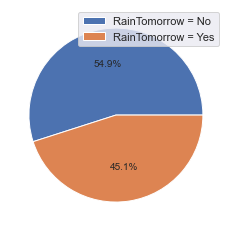

In [11]:
# 1) Prepare the dataset
# Define the final evaluation set
X_train, X_final_eval, y_train, y_final_eval = train_test_split(ausSWdf.drop("RainTomorrow", axis=1), ausSWdf["RainTomorrow"], test_size=0.25, random_state=111)

# Oversample to reduce imbalance in the training set
dt = pd.merge(X_train, y_train, left_index=True, right_index=True)
dt_1 = dt[dt['RainTomorrow'] == 1]
dt_0 = dt[dt['RainTomorrow'] == 0]  
dt_1_oversampled = resample(dt_1, random_state=42, n_samples=len(dt_1)*4, replace=True)   # over-sample the minority class (4x)
dt_train_balanced = shuffle(pd.concat([dt_1_oversampled, dt_0]))   # concatenate the over-sampled dataframe with the other
X_train_b = dt_train_balanced.drop("RainTomorrow", axis=1)
y_train_b = dt_train_balanced["RainTomorrow"]
plt.pie(dt_train_balanced["RainTomorrow"].value_counts(), autopct = '%.1f%%')
plt.legend(["RainTomorrow = No", "RainTomorrow = Yes"]);

# Scale the data
scaler = MinMaxScaler()
X_train_b_sc = pd.DataFrame(scaler.fit_transform(X_train_b)) 
X_final_eval_sc = pd.DataFrame(scaler.transform(X_final_eval))

print(f"Lenght of the training dataset: {len(X_train_b_sc)}")
print(f"Lenght of the final evaluation dataset: {len(X_final_eval_sc)}")
print("-------------------------------------------------")
print("Show rebalancing of the target class:")

In [12]:
# 2) Example of Model selection with nested CV

# a) prepare the inner cv 
list_models = [KNeighborsClassifier(), RandomForestClassifier(), LinearDiscriminantAnalysis()]
param_grids = [{"n_neighbors": [5, 25, 50, 100, 150], "weights": ['uniform', 'distance']},
                {"n_estimators": [30, 50, 100, 150], "criterion": ["gini", "entropy"], "max_depth": [50, 100, None]},
                {"shrinkage": [None]}] 
mod_names = ("kNN", "RandomForest", "LDA")

dict_CVgrids = inner_CV_setup(list_models, param_grids, mod_names, 3, scoring_metric="f1_macro", seed=33)  # stratifiedKfold and GridSearchCV for inner CV (rs used to set random_seed)

# b) perform nested CV
nestedCV_results = nestedCV_model_selection(dict_CVgrids, 3, X_train_b_sc, y_train_b, scoring_metric="f1_macro", seed=22)  # stratifiedKfold for outer CV
nestedCV_results

,LDA,RandomForest,kNN
OuterCV_average_Score%,74.176948,93.384339,86.195060
OuterCV_std%,0.312282,0.575259,0.902108


## 3) Final Hyperparameters tuning and Evaluation for the best model

In [13]:
# Identify best model
best_model = RandomForestClassifier()
# Define parameters grid used for the final hyperparams tuning (could be different or same as before)
best_grid = {"n_estimators": [30, 50, 100, 150], "criterion": ["gini", "entropy"], "max_depth": [50, 100, None]}

# final hyperparams tuning
best_mod_tuned = final_tuning(best_model, best_grid, 4, X_train_b_sc, y_train_b, scoring_metric="f1_macro", seed=11)  # stratifiedKfold and GridSearchCV
print(f"Best model with tuned hyperparameters: {best_mod_tuned}")

Best model with tuned hyperparameters: RandomForestClassifier(criterion='entropy', max_depth=50, n_estimators=50)


In [14]:
# Final evaluation to the best tuned models
best_mod_tuned.fit(X_train_b_sc, y_train_b)
predictions = best_mod_tuned.predict(X_final_eval_sc)
print(classification_report(y_final_eval, predictions))

              precision    recall  f1-score   support

         0.0       0.89      0.92      0.90      2152
         1.0       0.69      0.59      0.64       626

    accuracy                           0.85      2778
   macro avg       0.79      0.76      0.77      2778
weighted avg       0.84      0.85      0.84      2778



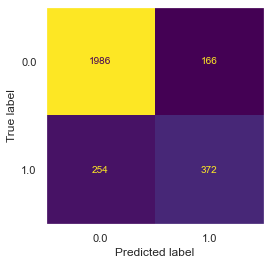

In [15]:
plot_confusion_matrix(best_mod_tuned, X_final_eval_sc, y_final_eval, colorbar=False)
plt.grid();  # remove sns grid

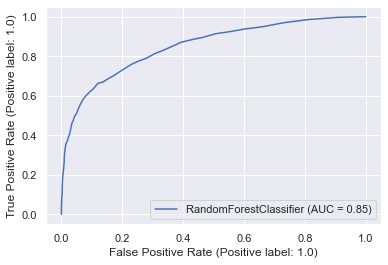

In [16]:
plot_roc_curve(best_mod_tuned, X_final_eval_sc, y_final_eval);

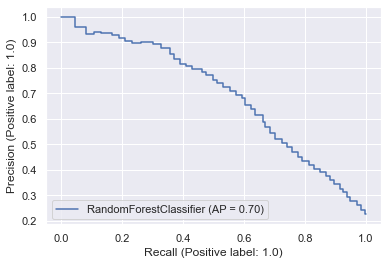

In [17]:
plot_precision_recall_curve(best_mod_tuned, X_final_eval_sc, y_final_eval);

In [18]:
# Show all the possible performance metrics which could be used in the nested CV functions
from sklearn.metrics import SCORERS
sorted(SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we